# MOVIELENS DATA ANALYSIS 


## INTRODUCTION
Movies are more than just a story on a big screen, they are the attraction of the performers, charm of the genres and grandeur of the directors that lure audiences to the theatre or in today’s world, to the digital platforms. Gone are the days when viewers used to scour newspapers for information regarding films and in fact, they need not go through the hassle at all. We can utilize the power of analytics, visualization tools and immense penetration of internet to provide the stakeholders with relevant information wherever they want and whenever they want. 

Keeping this in mind we set forth to produce an analysis report that could be used by: 
1.	Film production companies: To gain an insight on how budget and ratings affect the profitability of movies, which release month makes the most profit and in gaining insight into the changing taste of audience with respect to the genres.
2.	Cineplex owners: In investing in the movies of most profitable directors or investing according to viewers taste.
3.	The Audience: By providing them with a summary of top 10  movies with respect to each genre and the most popular directors.

To accomplish the aforementioned tasks we acquired a data file from Kaggle which provided us with information like overview of the movie, release date, revenue collected, runtime and language of the movie. We  also downloaded additional data files from Kaggle which captured in detail the viewer ratings, the popularity and information regarding the cast and crew members of the movie. These files were blended together to fulfil the objectives. 

###### A short description of our data
- We have a dataset of movies from year 1894 to 2013 and contains approximately 47,000 records
- The dataset has separate files for movie information, movie credits and movie ratings which we will be using
- Variables having multiple values are in JSON Stringified format which we would be transforming

We will be working with 3 files in our movie dataset:
1. movies_metadata - contains details about the movie like title, overview, revenue, genres, popularity, country, production houses, etc
2. credits - contains cast, crew of all movies
3. rating - contains ratings of movies from more than 10,000 users

### IMPORTING IMPORTANT LIBRARIES


In [46]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import datetime
import calendar
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 300)
%matplotlib inline

### READING DATASET FILES

In [47]:
path = 'C:/Users/Aashay/the-movies-dataset/'
mv = pd.read_csv(path + "movies_metadata.csv")
cred = pd.read_csv(path + "credits.csv")
rt = pd.read_csv(path + "ratings.csv")

##### Removing columns that won't be used since they are only links and don't have any informative value for our analysis

In [48]:
#deleting unwanted columns
del mv['poster_path'] 
del mv['homepage']
del mv['video']

##### We are generalizing indexes from different datasets for easy reference 

In [49]:
temp = mv[mv.adult == 'False']
temp2 = mv[mv.adult == 'True']
mv = temp.append(temp2)

##### On data exploration, we observed that few records contained garbage value and could easily be removed if filtered on the basis of adult column

In [50]:
mv.rename(columns = {'id' : 'movieId'}, inplace = True)
cred.rename(columns = {'id' : 'movieId'}, inplace = True)
mv.movieId = mv.movieId.astype(int)
mv.set_index('movieId', inplace = True)
cred.movieId = cred.movieId.astype(int)
cred.set_index('movieId', inplace = True)

###### Calculating average user rating for each movie and addinga a new column to our dataframe
###### We create  compatible ids in the data files for merging data files

In [51]:
mean_rating = rt.groupby(by = ['movieId'], as_index = False)['rating'].mean()
mean_rating.movieId = mean_rating.movieId.astype(int)
mean_rating.set_index('movieId', inplace = True)

#Blending credits and rating files with main movie_metadata file based on key - 'movieId':
mv = mv.join(cred)
mv = mv.join(mean_rating)
mv.head()

,adult,belongs_to_collection,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,rating
movieId,,,,,,,,,,,,,,,,,,,,,,,
2,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,3.86049,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1988-10-21,0.0,69.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Released,NaN,Ariel,7.1,44.0,"[{'cast_id': 3, 'character': 'Taisto Olavi Kas...","[{'credit_id': '52fe420dc3a36847f800001f', 'de...",3.236953
3,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",2.29211,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1986-10-16,0.0,76.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Shadows in Paradise,7.1,35.0,"[{'cast_id': 5, 'character': 'Nikander', 'cred...","[{'credit_id': '52fe420dc3a36847f8000077', 'de...",3.175550
5,False,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,9.02659,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-09,4300000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,539.0,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",3.079565
6,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",5.53867,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",1993-10-15,12136938.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.4,79.0,"[{'cast_id': 7, 'character': 'Frank Wyatt', 'c...","[{'credit_id': '52fe420dc3a36847f800023d', 'de...",3.841764
11,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,42.1497,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",1977-05-25,775398007.0,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,6778.0,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",3.660591


###### Now let's see what are our current columns  

In [52]:
mv.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'rating'],
      dtype='object')

###### Rearranging the columns for better readability

In [53]:
mv = mv[['title','adult', 'belongs_to_collection', 'budget', 'genres', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'rating']]


#### All cleaning operations will now be done on our main dataframe - mv

 - belongs_to_collection, genres, production_countries, production_companies, spoken_languages columns are in a JSON object format. We will now reformat these columns to comma separated values of corresponding names. 
 - Replacing blank values in belongs_to_collection column with 'No Collection'

In [54]:
#reformatting column from JSON object to comma seperated values
mv['belongs_to_collection'] = mv['belongs_to_collection'].str.split(':|,',expand = True)[3]
#Replacing blank collection with no collection
mv['belongs_to_collection'] = mv['belongs_to_collection'].fillna('No Collection')


###### Converting JSON object to comma separated values in genres, production_countries, production_companies, spoken_language, cast column


In [55]:
#genres column
mv.genres = mv['genres'].fillna('').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else []) 

#production_countries column
mv['production_countries'] = mv['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

#modifying adult column
temp = mv[mv.adult == 'False']
temp2 = mv[mv.adult == 'True']
mv = temp.append(temp2)

#production_companies
mv['production_companies'] = mv['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

#spoken_languages column
mv['spoken_languages'] = mv['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x: [i['iso_639_1'] for i in x] if isinstance(x, list) else [])

#cast column
mv['cast'] = mv['cast'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])



###### Removing movies that have status as Cancelled, in prod, rumoured, planned, blanks. These movies won't be required for our data analysis

In [56]:
mv = mv[(mv.status == 'In Production') | (mv.status == 'Released') | (mv.status == 'Post Production')]

 ###### - Removing records where (popularity = 0 and runtime < 10) 
 ###### - On observing dataset and based on domain research, we concluded that these records might represent garbage values. Hence removed  

In [57]:
mv.runtime = mv.runtime.fillna(0).astype(int, copy = True)
mv.popularity = mv.popularity.fillna(0).astype(float, copy = True)
mv = mv[(mv.popularity != 0) & (mv.runtime > 10)]

###### Converting release date to datetime format

In [58]:
mv['release_date'] = mv['release_date'].apply(pd.to_datetime)

### We would also require a column for profit of movies. We use the following formula:
##### Profit = Revenue - Budget

In [59]:
mv.budget = pd.to_numeric(mv["budget"], errors = 'coerce')
mv["profit"] = mv["revenue"] - mv["budget"]

### Our Final Dataframe 

In [60]:
mv.head(5)

,title,adult,belongs_to_collection,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew,rating,profit
movieId,,,,,,,,,,,,,,,,,,,,,,,,
2,Ariel,False,No Collection,0,"[Drama, Crime]",tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,3.860491,"[Villealfa Filmproduction Oy, Finnish Film Fou...",[Finland],1988-10-21,0.0,69,"[fi, de]",Released,NaN,7.1,44.0,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä...","[{'credit_id': '52fe420dc3a36847f800001f', 'de...",3.236953,0.0
3,Shadows in Paradise,False,No Collection,0,"[Drama, Comedy]",tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",2.292110,[Villealfa Filmproduction Oy],[Finland],1986-10-16,0.0,76,"[en, fi, sv]",Released,NaN,7.1,35.0,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman...","[{'credit_id': '52fe420dc3a36847f8000077', 'de...",3.175550,0.0
5,Four Rooms,False,No Collection,4000000,"[Crime, Comedy]",tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,9.026586,"[Miramax Films, A Band Apart]",[United States of America],1995-12-09,4300000.0,98,[en],Released,Twelve outrageous guests. Four scandalous requ...,6.5,539.0,"[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",3.079565,300000.0
6,Judgment Night,False,No Collection,0,"[Action, Thriller, Crime]",tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",5.538671,"[Universal Pictures, Largo Entertainment, JVC ...","[Japan, United States of America]",1993-10-15,12136938.0,110,[en],Released,Don't move. Don't whisper. Don't even breathe.,6.4,79.0,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary...","[{'credit_id': '52fe420dc3a36847f800023d', 'de...",3.841764,12136938.0
11,Star Wars,False,'Star Wars Collection',11000000,"[Adventure, Action, Science Fiction]",tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,42.149697,"[Lucasfilm, Twentieth Century Fox Film Corpora...",[United States of America],1977-05-25,775398007.0,121,[en],Released,"A long time ago in a galaxy far, far away...",8.1,6778.0,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",3.660591,764398007.0


# Data Analysis

## Which factors affect revenue generation for a movie?

### Calculating correlation among numerical variables to perform initial exploration

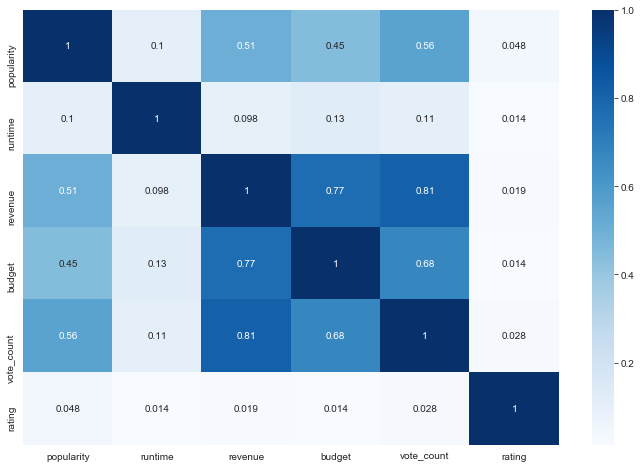

In [61]:
mv_corr = mv[['popularity', 'runtime', 'revenue', 'budget', 'vote_count', 'rating']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(mv_corr,cmap='Blues',annot = True)

 - We observe that there is strong positive correlation between  - Revenue and Budget, Revenue and vote_count
 - We can also see that there is a mild positive correlation between - Popularity and and vote_count, Revenue and Popularity
 - We can observe that other factors such as runtime and and rating have a verhy weak correlation with revenue.
 
##### Inference: Since popularity of a movie can be quantified on the terms of positive votes it recieves therefore we observe a mild correlation between popularity and vote count. On the other hand people vote to express their opinion regarding the movie either by upvoting it or down voting it. Therefore if a movie has large vote_count it means it has been watched by large number of people and hence a strong correlation between vote_count and revenue. 

##### A further analysis regarding correlation between revenue and budget needs to be done.

### How does popularity and budget affect profitability of movies ?

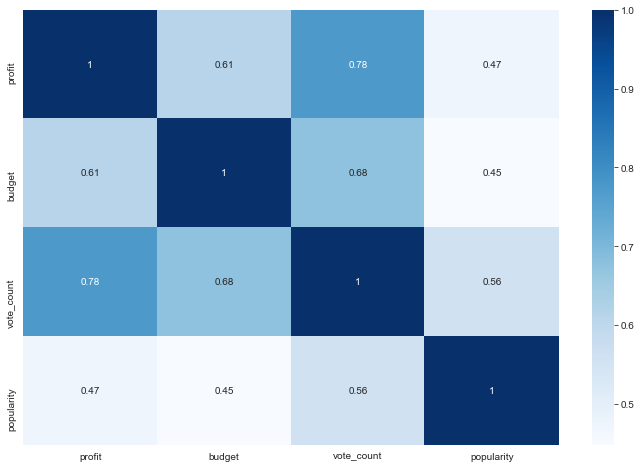

In [62]:
mv2_corr = mv[['profit','budget', 'vote_count','popularity']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(mv2_corr,cmap='Blues',annot = True)


#### To get a better sense of correlation between revenue and budget we calculate correlation between profit budget and vote count
A correlation between profit and the variables is necessary because a movie can earn huge revenue but still remain unprofittable due to high budget or might accrue small revenue but can be immensely profittable due to small budget.

From the matrix :
- we can observe that there is a strong correlation between profit and budget as well as profit and vote count
- correlation between profit and popularity dwindles further.

###### Inference: Profitability of a movie is stronly related to budget as well as with vote_count and even more weakly related with popularity. This confirms our inference in terms of correlation between revenue, profit, popularity and vote_count.

###### We explore this relationship further.

### Do release months (seasonality) have an affect on profitability of a movie?

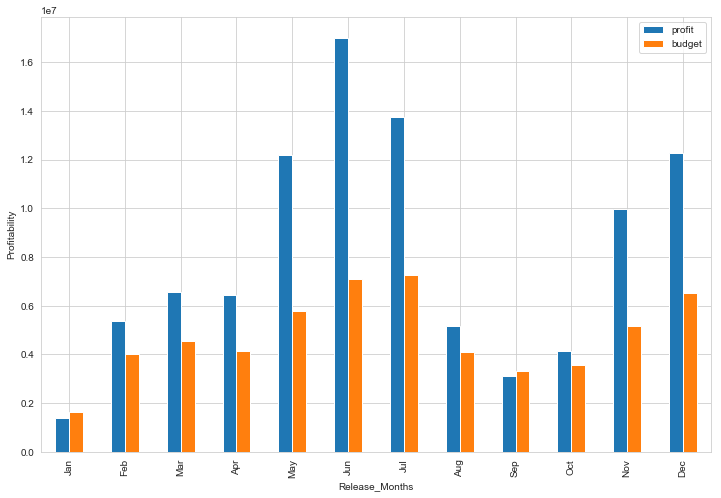

In [63]:
df=mv.copy()
order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df['release_date']=pd.to_datetime(df['release_date'],errors='coerce')
df['TMP'] = df.index.values                # index is a DateTimeIndex
df = df[df.TMP.notnull()]                  # remove all NaT values
df.drop(['TMP'], axis=1, inplace=True)

df=df[df.release_date.notnull()]
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date']=pd.DatetimeIndex(df['release_date']).month
df['release_date']=df['release_date'].apply(lambda x: calendar.month_abbr[int(x)])

df_out = pd.DataFrame(df.groupby('release_date')['profit','budget'].mean())
df_out = df_out.reset_index()
hist=df_out.set_index('release_date').loc[order].plot(kind='bar',figsize=(12,8))
hist.set_xlabel("Release_Months")
hist.set_ylabel("Profitability")

plt.show(hist)

### Plotting a bar chart to visualize the mean budget of movies released in each month versus mean profit of such movies

- We observe a trend that profits are higher from movies which are strongly budgeted.
- We also observe that June, July and December are the months which result in higher profitability for movies released in those months.
- However the trend of cummulative profit being higher than cummulative budget reverses in the month of January and September.



###### Inference:June, July and December are holiday seasons and therefore reptresent a preferred season for the release of strongly budgetted movies as the chances of earning more revenue becomes higher. On the other hand low budgetted movies prefer to avoid compettion and are mostly released during the months of January, September and October. Hence, providing a reason for strong correlation between budget and profit. Another reason for strong correlation between budget and profit is that a strong budget means better star cast , visual effects etc. thus attracting more viewership.

###### Observing distribution of above graph for outliers

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


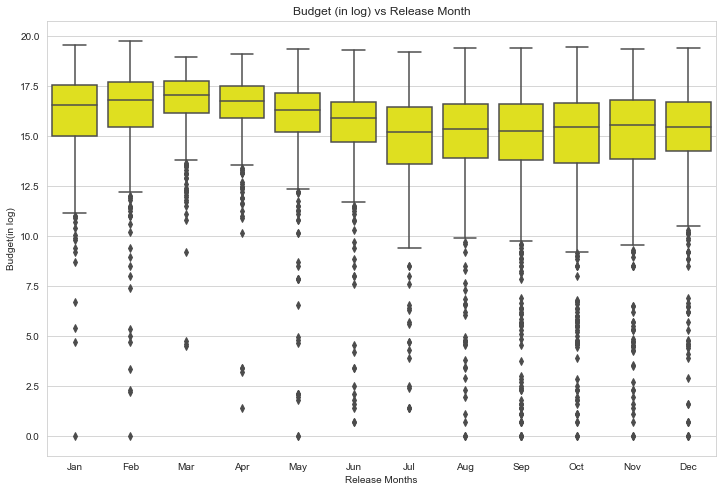

In [64]:

df_temp = df[df.budget > 0]
df_temp['log_budget']= np.log(df_temp.budget)
order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df_temp = df_temp.reset_index()
hist_temp=df_temp.set_index('release_date').loc[order]
sns.set_style("whitegrid") 
plt.figure(figsize = (12,8))
# As the budget of different movies varies with billion of dollars so as to accomodate the budget for better visualization 
#we have conveted the budget as log
plot_box = sns.boxplot(x = hist_temp.index, y =df_temp.log_budget, data = hist_temp, color = 'Yellow')
plot_box.set(xlabel='Release Months', ylabel='Budget(in log)')
plt.title('Budget (in log) vs Release Month')
plt.show(plot_box)

#### A box plot is plotted to between log of budget and release months to see if outliers had an effect on the observation made in our last graph

- We observe that the height of box plots of budgets for each months remain approximately similar 
- We observe that median budget of movies remain similar for each of the 12 months.
- We observe that upper whiskers in the months of summer months (April, May and June) are longer than upper whiskers of January.
- We observe that lower whiskers of January and September are longer than those in summer months

###### Inference: The observations from the box plot suggest that most strong budgeted movies are released during the summer months while weak budgeted movies prefer January and September. This confirms our observations made in the seasonality barplot. This also negates the eefect of any outlier in the previous plot.



### Which are the preferred months flor relasing movies? Does this affect our observation regarding seasonality and budget?

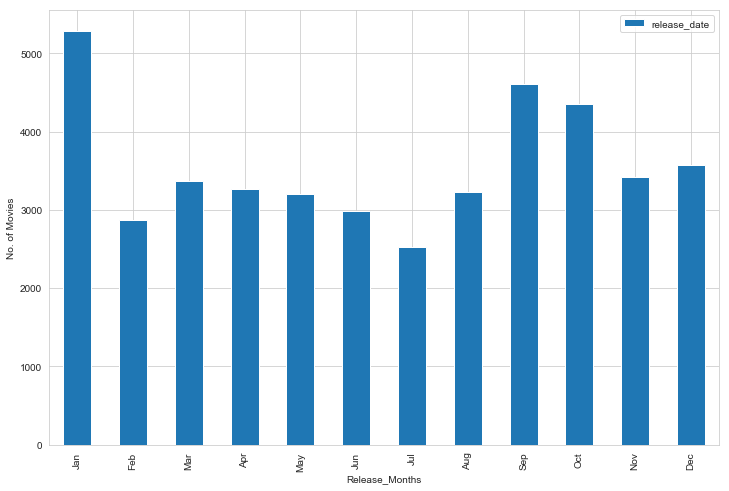

In [65]:
order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df=mv.copy()
df['release_date']=pd.to_datetime(df['release_date'],errors='coerce')
df['TMP'] = df.index.values                # index is a DateTimeIndex
df = df[df.TMP.notnull()]                  # remove all NaT values
df.drop(['TMP'], axis=1, inplace=True)

df=df[df.release_date.notnull()]
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date']=pd.DatetimeIndex(df['release_date']).month
df['release_date']=df['release_date'].apply(lambda x: calendar.month_abbr[int(x)])

df_out = pd.DataFrame(df.release_date.value_counts())
df_out = df_out.reset_index()
hist=df_out.set_index('index').loc[order].plot(kind='bar',figsize=(12,8))
hist.set_xlabel("Release_Months")
hist.set_ylabel("No. of Movies")
hist

### Plotting a bar chart to visualize total number of movies released till 2010 in each month
- We can observe that maximum number of movies were released in January followed by September, October and December
- We can also observe that number of movies released in April, May, June and July are comparatively much lower than those released in January


### Final results from exploration of relation between budget, profit and the month in which they are released

- We can observe that though maximum number of movies are released in January but most strongly budgeted movies are released in June and July. Since there is a strong correlation between profit and budget therefore profitability from movies released in June and July is much higher than those rleased in January.

- We can also observe that the sum of budgets of the movies released in January is higher than the sum of profits from such movies which does not align with the general trend in these plots.

###### Inference: June and July are favourable months for release of strongly budgeted movies as they are summer months as well as holiday season. Janury on the other hand is favourable for lower budget movies as they could avoid competing against strong budgeted movies. Moreover, most of the low budgeted movies are released during January as they want to be screened at Cannes film festival scheduled during the month of May. On the other hand low budget movies also favour  September and October  for release  as to take the advantage of Academy award  submissions which is mostly due by Novemeber.
    

### ANALYSING VOTING TRENDS

###### Since vote counts are an important factor in determining popularity and revenue of movies therfore we seek to further explore voting trends over the decades. Our motive is to extract information regarding how has been the pattern of people expressing their opinion regarding movies

In [66]:
temp = mv.copy()
temp.release_date.dropna(inplace = True)
df_new=temp.copy()
df_new=df_new[df_new.release_date.notnull()]
df_new['release_year'] = pd.to_datetime(df_new['release_date'])
df_new['release_year'] = pd.DatetimeIndex(df_new['release_date']).year

For a movie recommendation system the count of votes of users play a vital role in analysing the popularity of an movie.The vote count generally reflect the taste of audience. So the trend of votes for different movies across different decades provides the information how audience involvement with respect to movies have changed over the decades

# Vote Count Trend across Decades 

## How voting habits of audiences have changed over the years?

For analyzing the trend of vote counts across different decades we first extracted year from the different release dates and merged different years into decades. Then we plotted line plot to show the trend of voting across different decades. 

Text(0.5, 1.0, 'Trend of vote count throughout decades')

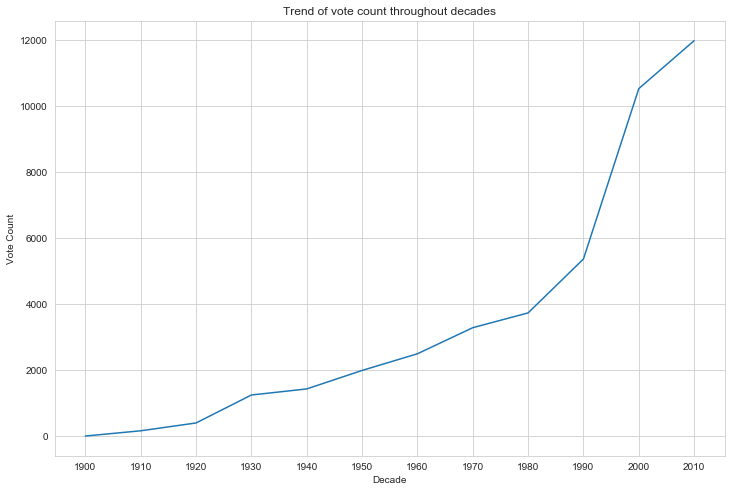

In [67]:
# Extracting year from release date for trend analysis
import math
def extract_decade(x):
    return str(math.floor(x/10)*10)

# Binning the release years into bins of decades for a decade wise analysis
df_new["decade"] = df_new["release_year"].apply(extract_decade)
df_new = df_new.sort_values(by=['decade'], ascending=True)
df_by_vote = df_new.groupby(['decade']).vote_count.count().reset_index()
#plotting votecount trend
plt.figure(figsize = (12,8))
sns.lineplot(df_by_vote['decade'],df_by_vote["vote_count"]) 
plt.ylabel('Vote Count')
plt.xlabel('Decade')
plt.title('Trend of vote count throughout decades')



- We can clearly observe an increase in votes by people with each passing year. However, after 1990 there is an almost exponential increase in votes.

###### Inference: Exponential increase vote counts after 1990 can be attributed to the advent of computers, smartphones and internet. Internet also provided different platforms for audience to voice their opinion e.g: IMDB, ROtten Tomatoes etc. Therefore we can say that as technology has improved it has given people more opprtunities to express their views. As avenues for expression improvied so did the interest in voicing their opinion about movies. 

# Analyzing the popular Genres

## Which are the top three genres under which maximum number of movies are produced?

It is almost intuitive that genres play an important role in attracting viewers and in increasing popularity and profitability of movies. So we analyse this important aspect of our data to gain some meaningful insights.

In [68]:
s = df_new.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
df_new = df_new.drop('genres', axis=1).join(s)

###### Separating genre for each movies into a list. It should be noted that each movie can be classified into more than one genres

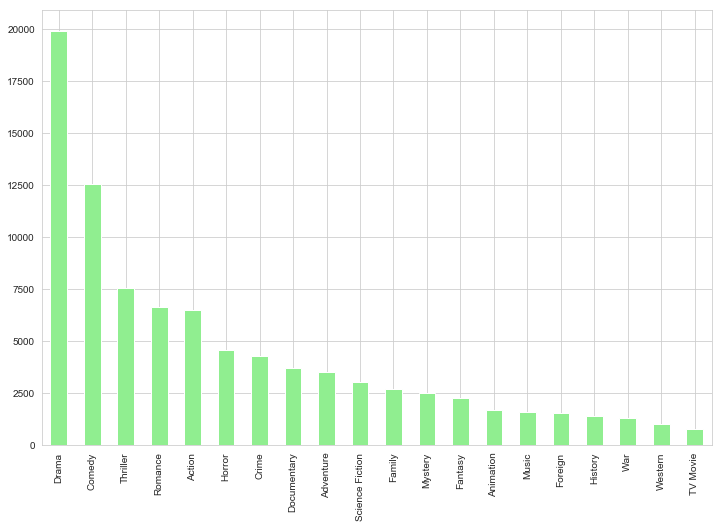

In [69]:
df_new['genre'].value_counts().plot.bar(color = 'LightGreen', figsize = (12, 8))

#### Plotting count of movies under each genre

- We can observe that the leading genres are Drama, Comedy and Thriller as they have maximum number of movies categorised under them

###### Inference: Drama, Comedy and Thriller are major genres and most movies are produced with theme conforming to these elements.


Besides the leading genres how each leading genre has performed through out 100 years also provides vital information for movie production. The trend of the genres can provide insights on movie production for leading genres in each decade. For this information a graph of count of leading 3 genres versus each decade is plotted as visualization.

## How have production of movies changed under the three leading genres over the 6 decades?

In [70]:
df_by_genre_drama = df_new.loc[df_new['genre'] == 'Drama']
df_by_genre_drama
df_drama = df_by_genre_drama.groupby(['decade']).genre.count().reset_index()
df_drama
df_by_genre_comedy = df_new.loc[df_new['genre'] == 'Comedy']
df_by_genre_comedy
df_comedy = df_by_genre_comedy.groupby(['decade']).genre.count().reset_index()
df_by_genre_thriller = df_new.loc[df_new['genre'] == 'Thriller']
df_by_genre_thriller
df_thriller = df_by_genre_thriller.groupby(['decade']).genre.count().reset_index()


###### Counting the number of movies categorised under the leading genres in each decade
######  Plotting the trend of movies produced under the three leading genres over the years 

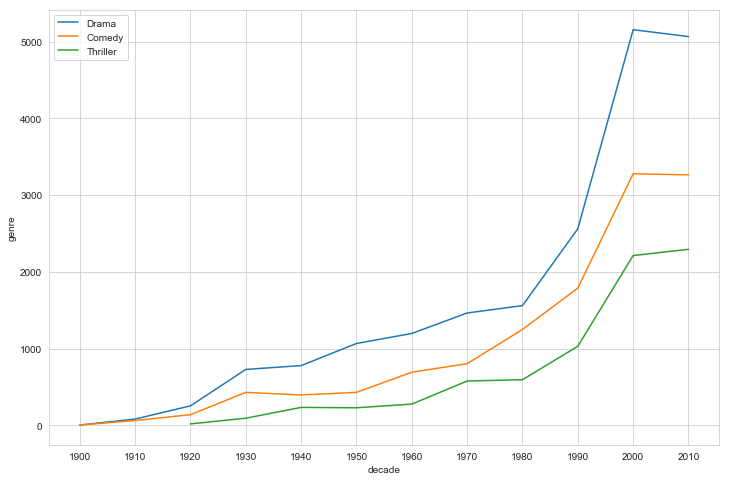

In [71]:
plt.figure(figsize = (12,8))
sns.lineplot(df_drama['decade'],df_drama["genre"],label="Drama") 
sns.lineplot(df_comedy['decade'],df_comedy["genre"],label="Comedy") 
sns.lineplot(df_thriller['decade'],df_thriller["genre"],label="Thriller" ) 

- We can observe that the count of movies being produced under the leading genres have been increasing continuously
- we see a drop in the trend in for Drama 
- We see that the trend has remained constant for Comedy and Thriller after 2000

###### Inference: Production of movies have increased exponentially over the decades and reached a peak near around the millenium. Since then the rate of increase in movie produced has remained constant or reduced. The drop in the trend led to futher analysis which provided us insight of increase in production of movies in other genres such as TV Movie,fantasy,animation


# Analyzing new genre called TV Movie

## How has the production of movies under the Genre TV Movie changed over the decades?

On exploration of data we observed that a new genre called TV Movie was introduced near around 1960. This pertains to movies that were released on television.The trend of movie produced in this genre has increased rapidly after 1990 due to TV platforms such as NETFLIX, Amazon Prime etc.


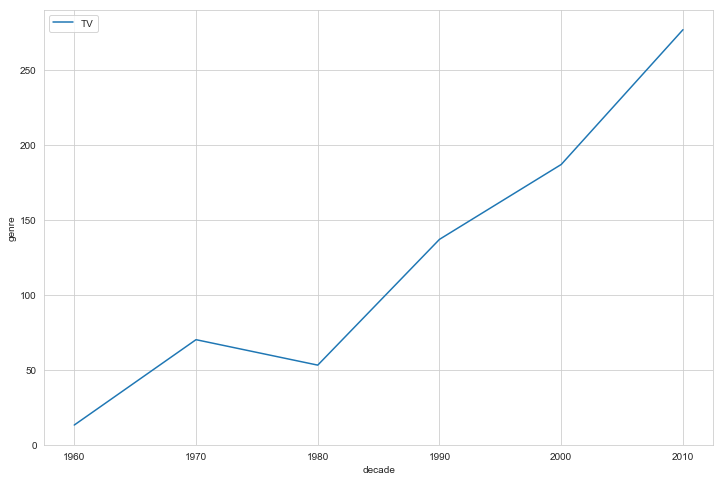

In [72]:
#Counting the number of movies categoried as TV Movies produced under each decade
df_by_genre_TV = df_new.loc[df_new['genre'] == 'TV Movie']
df_by_genre_TV
df_TV= df_by_genre_TV.groupby(['decade']).genre.count().reset_index()
plt.figure(figsize = (12,8))
sns.lineplot(df_TV['decade'],df_TV["genre"],label="TV" ) 

#### Plotting the trend of movies produced under the genre TV Movies over the decades

- We can observe that the count of movies produced under this genre has been increasing ever since they were introduced in 1960

###### Inference: TV was introduced in the market in 1928 and commercial broadcast started in 1940. TV as a medium has grown organically ever since. It provide sa wider range of audience and hence number of movies produced for the medium keeps on increasing with each pasing decade.

# Average Rating of genre over decades

## How has the advent of TV Movie changed the popularity of the leading genres over the decades?

In [73]:
# Counting vote counts for the Comedy, Drama and TV Movie in each decade.
grouped_data_drama = df_by_genre_drama.groupby(["decade"]).vote_average.mean().reset_index()
grouped_data_drama
grouped_data_comedy = df_by_genre_comedy.groupby(["decade"]).vote_average.mean().reset_index()
grouped_data_comedy
grouped_data_thriller = df_by_genre_thriller.groupby(["decade"]).vote_average.mean().reset_index()
grouped_data_thriller
grouped_data_TV = df_by_genre_TV.groupby(["decade"]).vote_average.mean().reset_index()


Text(0.5, 1.0, 'Average Rating of genre over decades')

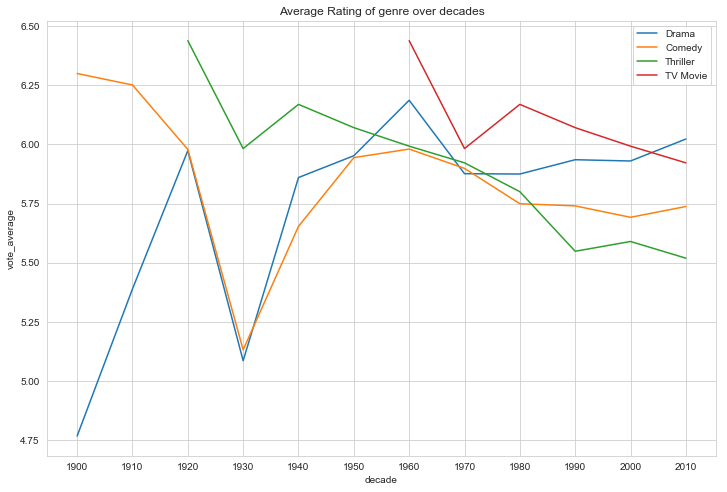

In [74]:
plt.figure(figsize = (12,8))
sns.lineplot(grouped_data_drama['decade'],grouped_data_drama["vote_average"],label="Drama") 
sns.lineplot(grouped_data_comedy['decade'],grouped_data_comedy["vote_average"],label="Comedy") 
sns.lineplot(grouped_data_thriller['decade'],grouped_data_thriller["vote_average"],label="Thriller" ) 
sns.lineplot(grouped_data_TV['decade'],grouped_data_thriller["vote_average"],label="TV Movie" ) 
plt.title('Average Rating of genre over decades')

### Plotting popularity for Drama, Thriller and TV Movie

- We can observe that the popularity of thriller has been decreasing while popularity of drama has gained improvement in each decade
- We can observe that popularity of Comedy has remained stagnant over the decades
- Popularity of TV Drama peaked during the 70s and then dropped then reaching a saturation level after which it became stable and reached the levels of the other three genres

###### Inference: Drama and TV Movie are the most popular movie genres. The sharp dip in popularity of all the genres during the decade 1930s-1940s can be attributed to turbulent times of the World Wars.
    

## ANALYSING THE ROLE OF DIRECTORS

A movie is the culmination of the efforts and creativity of its directors. So we analyse how directors affect the profitability and popularity of the movies.

## Which are the top 10 directors on the basis of profitability of their movies? Wich are the top 10 directors on the basis of popularity of their movies?

In [75]:
#Generating a new column as director
temp = mv[mv.adult == 'False']
temp2 = mv[mv.adult == 'True']
mv = temp.append(temp2)
mv_new = mv.copy()
mv_new.dropna(subset=["crew"],inplace=True)
mv['crew'] = mv['crew'].apply(literal_eval)

In [76]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

mv['director'] = mv['crew'].apply(get_director)


### We will now find the count of movies each director has directed and append it to our main dataframe

In [77]:
directors = pd.DataFrame(mv.groupby(by = 'director')['director'].count())
directors.columns = ['count']
directors.sort_values(by = 'count', ascending = False)
directors.reset_index(inplace = True)
mv = mv.merge(directors, on = 'director', how = 'left')
mv.count = pd.to_numeric(mv.count, errors = 'ignore')

### We have plotted the graph of most profitable directors who have directed more than 5 movies 

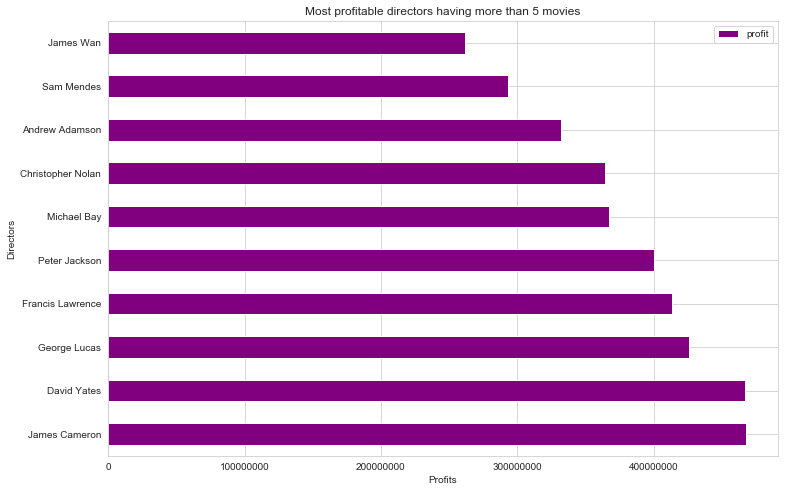

In [78]:
temp = mv.loc[mv['count'] >= 5]
mv_profit = temp.dropna(subset = ['budget', 'revenue', 'profit']) 
counts = mv.director.value_counts()
director_profit = mv[mv['count'] > 5].groupby(by = 'director', as_index= False)['profit'].mean().sort_values(by = 'profit', ascending = False).iloc[:10]
ax = director_profit.plot('director', 'profit',title = 'Most profitable directors having more than 5 movies', kind = 'barh',figsize = (12,8), color = 'Purple')
ticks =  ax.get_xticks()
plt.ylabel('Directors')
plt.xlabel('Profits')
# set labels to absolute values and with integer representation
ax.set_xticklabels([int(abs(tick)) for tick in ticks])
plt.show()

#### Plotting the chart of Directors who have proved to be very profittable and have produced atleast 5 movies.

- We can observe that movies directed by James Cameron have earned the most profits.

###### Inference: Avatar and Titanic were directed by James Cameron and have remained the top grossers ever.

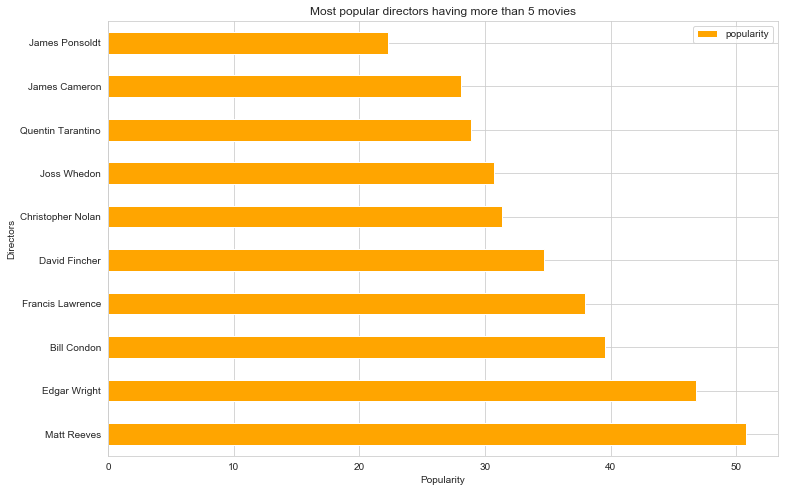

In [79]:
mv_pop = temp.dropna(subset = ['popularity']) 
counts = mv.director.value_counts()
director_pop = mv[mv['count'] >= 5].groupby(by = 'director', as_index= False)['popularity'].mean().sort_values(by = 'popularity', ascending = False).iloc[:10]
director_revenue = mv.groupby(by = 'director', as_index= False)['revenue'].mean().sort_values(by = 'revenue', ascending = False).iloc[:10]
ax = director_pop.plot('director', 'popularity',title = 'Most popular directors having more than 5 movies', color = 'Orange', kind = 'barh',figsize = (12,8))
ticks =  ax.get_xticks()
plt.ylabel('Directors')
plt.xlabel('Popularity')
# set labels to absolute values and with integer representation
ax.set_xticklabels([int(abs(tick)) for tick in ticks])
plt.show()

#### Plotting the chart of Directors whose movies have proved to be among the most popular and have directed atleast 5 movies.

- We can observe that movies directed by Matt Reeves garner the maximum votes and therefore have been very popular among the viewers.

###### Inference: Batman and War of Planet of the apes were directed by Matt Reeves. These movies have been very popular among varying age groups in the audience and hence attract lot of votes.

##### Below is a comparative study of films which are in a collection and films which are not in a collection. Specifically, we have taken the top 10 most profitable directors of all time. 
##### Five of those directors have made films which belong to a collection while other five  have mostly made films independent to each other. 


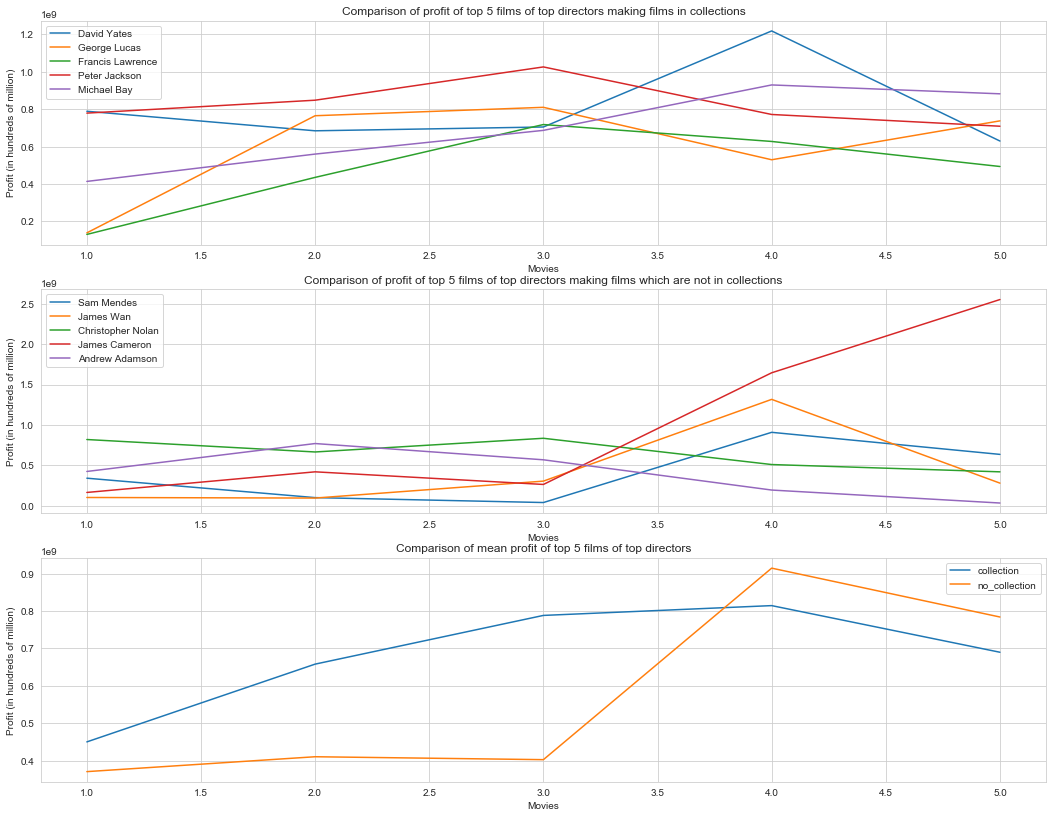

In [80]:
k = mv[(mv['count'] > 5) & (mv['profit'] > 0)]
k = pd.DataFrame(k[['director', 'title', 'profit']].groupby(by = ['director', 'title'])['profit'].mean())
k.columns = ['profit']
k = k['profit'].groupby(level = 0, group_keys = False).nlargest(5).reset_index()
#filtering directors who have directed film collections
collec_directors = ['David Yates', 'George Lucas', 'Francis Lawrence', 'Peter Jackson', 'Michael Bay']
nocollec_directors = ['Sam Mendes', 'James Wan', 'Christopher Nolan', 'James Cameron', 'Andrew Adamson']
k = k[k['director'].isin(director_profit.director)] 
merged = pd.merge(left = k, right = pd.DataFrame(df_new[['belongs_to_collection', 'title', 'release_year']]), how = 'left', left_on = 'title', right_on = 'title')
merged.drop_duplicates(inplace = True)
merged.drop([26, 38, 99, 102], inplace = True)
merged.sort_values(by = ['director', 'release_year'], inplace = True)
merged['number'] = list(range(1,6)) * 10
plt.figure(figsize = (18,14))
plt.subplot(3,1,1)
for i in list(collec_directors):
    ax = sns.lineplot(merged['number'],merged["profit"][merged.director == i], label=i)
    plt.title ('Comparison of profit of top 5 films of top directors making films in collections')
    plt.ylabel('Profit (in hundreds of million)')
    plt.xlabel('Movies')
plt.subplot(3,1,2)
for i in list(nocollec_directors):
    ax = sns.lineplot(merged['number'],merged["profit"][merged.director == i], label=i)
    plt.title ('Comparison of profit of top 5 films of top directors making films which are not in collections')
    plt.ylabel('Profit (in hundreds of million)')
    plt.xlabel('Movies')
plt.subplot(3,1,3)
collec = merged[merged.director.isin(collec_directors)]
nocollec = merged[merged.director.isin(nocollec_directors)]
collec.belongs_to_collection = 'collection'
nocollec.belongs_to_collection = 'no_collection'
concatted = collec.append(nocollec).sort_values(by = 'release_year')
concatted = concatted.groupby(by = ['belongs_to_collection', 'number'])['profit'].mean().reset_index()
for i in ['collection', 'no_collection']:
    ax = sns.lineplot(concatted['number'],concatted["profit"][concatted.belongs_to_collection == i], label = i)
    plt.title ('Comparison of mean profit of top 5 films of top directors')
    plt.ylabel('Profit (in hundreds of million)')
    plt.xlabel('Movies')


- From the above graphs we can see that moveis that belong to a collection have initially low profits and profits steadily increase and stabilizes after a certain point
- While independent movies have unpredictable trend and completely depends on the director profitability

###### Inferences: For a collection of movies, it can be possible that as movies in the same collection are released, their budget increases and thereby profitability increases too. Independent movies have relatively low profits overall since the core idea of every movie might be different and while context for a movie in a collection is already set in viewers' mind and they tend to watch the movies even if it is not highly rated. 


###### Additional inferences: Setting context using multiple movies - Marvel Cinematic Universe
###### As rightly implemented by Marvel, strategy of making films in a collection helps set a predefined context in viewers' mind and viewers look forward to watching the sequel even before it is released. This strategy has led to Avengers: Endgame which is the highest grossing movie of all time.  


# SUMMARIZING TOP 10 MOVIES WITH RESPECT TO GENRES BASED ON DIFFERENT CRITERIAS


## Which are the top 10 movies with highest ratings under each Genre?

In [81]:
df_new["budget"] = pd.to_numeric(df_new.budget, errors='coerce')
df_new["profit"] = df_new["revenue"] - df_new["budget"]
df_new_sorted=df_new.sort_values(by=['vote_average'],ascending= False)
df = pd.DataFrame(df_new_sorted.groupby(by =[ 'genre', 'title'])["vote_average"].mean())
g = df['vote_average'].groupby(level=0,group_keys=False)
print('A sample of data is shown below:')
display(pd.DataFrame(g.nlargest(10).head(20)))

A sample of data is shown below:


vote_average
genre     title                                          
Action    Backyard Dogs                              10.0
          High Roller: The Stu Ungar Story           10.0
          Mortal Kombat: The Journey Begins          10.0
          Oh, Bomb!                                  10.0
          Pan                                        10.0
          Ten Benny                                  10.0
          The Lion of Thebes                         10.0
          Tokyo Ghoul                                10.0
          One Man's Hero                              9.3
          The River Thief                             9.3
Adventure Back to School with Franklin               10.0
          Girl in the Cadillac                       10.0
          Shark Kill                                 10.0
          Symphony of the Soil                       10.0
          The Lion of Thebes                         10.0
          King of Katoren                             9.5
          The River Thief                             9.3
          Arabella, the Pirate's Daughter             9.0
          From Mexico With Love                       9.0
          Frontier                                    9.0

#### Above table gives a list of top 10 highest rated movies under each genre

In [82]:
df_new_sorted=df_new.sort_values(by=['profit'],ascending= False)
df = pd.DataFrame(df_new_sorted.groupby(by =[ 'genre', 'title'])["profit"].mean())
g = df['profit'].groupby(level=0,group_keys=False)
v_old= pd.DataFrame(g.nlargest(10))
v_old = v_old.drop(['profit'], axis=1)
v_old = v_old.reset_index()
v_old = v_old.set_index('genre')
v_old.columns = ['Titles by Profit']

In [83]:
df_new_sorted=df_new.sort_values(by=['popularity'],ascending= False)
df = pd.DataFrame(df_new_sorted.groupby(by =[ 'genre', 'title'])["popularity"].mean())
g = df['popularity'].groupby(level=0,group_keys=False)
v_new = pd.DataFrame(g.nlargest(10))
v_new = v_new.drop(['popularity'], axis=1)
v_new = v_new.reset_index()
v_new = v_new.set_index('genre')
v_new.columns =['Titles by Popularity'] 

In [84]:
v = pd.concat([v_old,v_new], axis = 1)
v.head(20)

,Titles by Profit,Titles by Popularity
genre,,
Action,Avatar,Baby Driver
Action,Star Wars: The Force Awakens,Big Hero 6
Action,Jurassic World,Deadpool
Action,Furious 7,Guardians of the Galaxy Vol. 2
Action,The Avengers,Avatar
Action,Avengers: Age of Ultron,John Wick
Action,The Lord of the Rings: The Return of the King,Captain America: Civil War
Action,Iron Man 3,Pirates of the Caribbean: Dead Men Tell No Tales
Action,The Fate of the Furious,Wonder Woman


### Above table produces a list of Top 10 movies under each genre and gives a comparative study between Profitable movie titles and popular movie titles 

- We can observe that for each genre top profitable movies are different than top popula movies

###### Inference : Popularity doesn't often means popularity as taste of viewers is subjective and kee on changing therefore their liking for the movies.

## Final Takeaways:
- Popularity dosent always lead to high profitability for a movie
- Viewer taste keeps on changing and therefore ratings of a movie can change
- Vote count means more number of viewers and hence increase in revenue
- Revenue and Profit have a strong positive correlation with budget of a movie
- Highest number of movies are released during January which also happens to be the season for low budget movies
- Mostly high budget movies are released during the summer months and holiday season i.e December
- Number of movies releasing each decade from 1900 have been increasing steadily and the top 3 genres based on count of movies are Drama, Comedy and Thriller
- A new Genre TV Movie was introduced in 1960 and the count of movies have been steadily increasing since then
- Great depression and world wars negatively affected production of movies. Another dip in the production of movies came during 1980s probably due to the beginning of Cold War
- Directors making movies belonging to a collection are relatively profitable and predictable than directors directing solo movies
